# Structurer un workflow pour le déployer en production

<img src="../images/workflow.png" alt="image workflow">

In [ ]:
import pandas as pd 
import seaborn as sns
from sklearn.model_selection import train_test_split

In [ ]:
data = sns.load_dataset('tips')

In [ ]:
data.info()

In [ ]:
data.head(2)

In [ ]:
y = data['tip']

In [ ]:
X = data.drop(columns=['tip'])

In [ ]:
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

# Iteration 1 - categoric features (get_dummies)

In [ ]:
X_train

In [ ]:
y_train

In [ ]:
#lr.fit(X_train, y_train)

In [ ]:
X_train.sample(5)

In [ ]:
X_train_dummies = pd.get_dummies(X_train)

In [ ]:
X_train_dummies.sample(4)

In [ ]:
lr_train = lr.fit(X_train_dummies, y_train)

In [ ]:
X_test_dummies = pd.get_dummies(X_test)

In [ ]:
lr_train.score(X_test_dummies, y_test)

---
# Iteration 2 - categoric + numeric features

In [ ]:
X_train_2,X_test_2, y_train_2, y_test_2 = train_test_split(X, y, test_size=0.3)

In [ ]:
sns.histplot(data=X_train_2[["total_bill"]], kde=True);

In [ ]:
sns.histplot(data=X_train_2[["size"]], kde=True)

---
# Scaler

### Numerical features

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
scaler.fit(X_train_2[["size","total_bill"]])
X_train_2_scaled = scaler.transform(X_train_2[["size","total_bill"]])

In [ ]:
X_train_2_scaled_df = pd.DataFrame(X_train_2_scaled).rename(columns={0: "size_scaled", 1: "total_bill_scaled"})

In [ ]:
X_train_2.head(20)

In [ ]:
X_train_2_scaled_df

### Categorical Features

In [ ]:
X_train_2[["sex","smoker","day","time"]].nunique()

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
ohe = OneHotEncoder()

In [ ]:
ohe.fit_transform(X_train_2[["sex","smoker","day","time"]])

In [ ]:
X_train_2_ohe = ohe.fit_transform(X_train_2[["sex","smoker","day","time"]])

In [ ]:
X_train_2_ohe_df = pd.DataFrame.sparse.from_spmatrix(X_train_2_ohe)

In [ ]:
X_train_2_ohe_df.head(2)

In [ ]:
X_train_2_prep_df = pd.concat([X_train_2_ohe_df, X_train_2_scaled_df], axis=1)

In [ ]:
X_train_2_prep_df

In [ ]:
lr_2 = LinearRegression()

In [ ]:
lr_2.fit(X_train_2_prep_df,y_train_2)

In [ ]:
#===> Il faut scalé le X_test_2_prep_df. Avec la même methodologie que le X_train_2, sans faire de dataLeakeage. 
# ==> Creéer les methodes appropriées pour réutiliser la logique.
X_test_2_scaled = scaler.transform(X_test_2[["size","total_bill"]])
X_test_2_scaled_df = pd.DataFrame(X_test_2_scaled).rename(columns={0: "size_scaled", 1: "total_bill_scaled"})
X_test_2_ohe = ohe.fit(X_train_2[["sex","smoker","day","time"]]).transform(X_test_2[["sex","smoker","day","time"]])
X_test_2_ohe_df = pd.DataFrame.sparse.from_spmatrix(X_test_2_ohe)
X_test_2_ohe_df.head(2)
X_test_2_prep_df = pd.concat([X_test_2_ohe_df, X_test_2_scaled_df], axis=1)
X_test_2_prep_df

In [ ]:
lr_2.score(X_test_2_prep_df, y_test_2)

In [ ]:
y_pred = lr_2.predict(X_test_2_prep_df)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
pd.get_dummies(X_train_2['sex'])

In [ ]:
# Afficher un nuage de point qui révéle les informations suivantes : y_true vs y_predict en fonction de total_bill
plt.figure()
plt.scatter(X_test_2['total_bill'], y_test_2, label='y_test', s=np.exp(X_test_2['size']), c='r')
plt.scatter(X_test_2['total_bill'], y_pred, label='y_pred', s=np.exp(X_test_2['size']), c=pd.get_dummies(X_test_2['sex'])['Female'])
sns.regplot(X_test_2['total_bill'], y_test_2)
plt.legend()

In [ ]:
# Re-tester avec un StandardScaler => https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html


/root/.pyenv/versions/simplon/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='tip'>

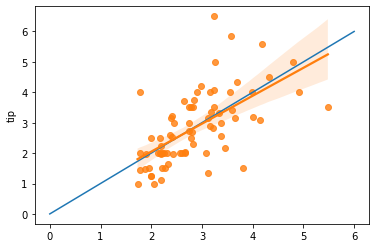

In [340]:
# Afficher l'hétéroscédasticité ou l'homoscédasticité des erreurs.
plt.plot(range(7),range(7))
sns.regplot(y_pred,y_test_2)

(array([ 4., 15., 19., 16.,  9.,  6.,  1.,  2.,  1.,  1.]),
 array([0.44453982, 0.65382706, 0.86311429, 1.07240152, 1.28168876,
        1.49097599, 1.70026322, 1.90955045, 2.11883769, 2.32812492,
        2.53741215]),
 <BarContainer object of 10 artists>)

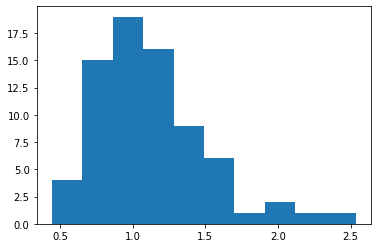

In [341]:
# Afficher la distribution des erreurs. (Normalité des erreurs).
from scipy.stats import norm
norm(y_pred, y_test_2)
plt.hist(y_pred/y_test_2)

In [ ]:
# Créer un package à l'aide https://pypi.org/project/setuptools/